# Objective

Investigate ways to sort "putatively correct" clusters (clusters with many unique workers annotating) based on fraction of workers who find a lot of clusters which a lot of other workers also find.

# Notes 20180727
Debugging Otsu's is not a priority for this analysis because it does not appear any more effective here than K-means.

In [1]:
from SpotAnnotationAnalysis import SpotAnnotationAnalysis
from BaseAnnotation import BaseAnnotation
from QuantiusAnnotation import QuantiusAnnotation

worker_marker_size = 8
cluster_marker_size = 40
bigger_window_size = False
img_height = 300
clustering_params = ['AffinityPropagation', -350]
pairwise_threshold = 1

show_correctness = True
correctness_threshold = 4

# Plots
Grouped by:
- background
    - number of spots
        - mean SNR

## Background: Tissue

In [2]:
json_filename = 'SynthTests_tissue.json'
gen_date = '20180719'
bg_type = 'tissue'

## Tissue, 50 spots

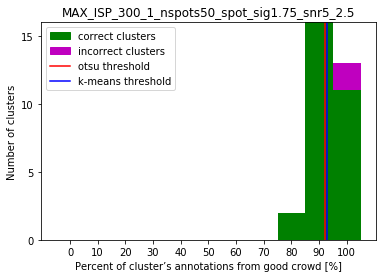

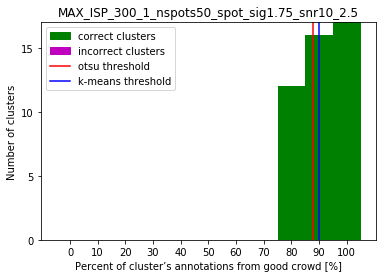

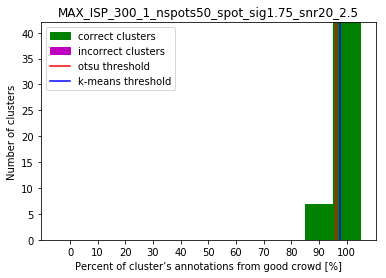

In [3]:
img_names = ['MAX_ISP_300_1_nspots50_spot_sig1.75_snr5_2.5',
             'MAX_ISP_300_1_nspots50_spot_sig1.75_snr10_2.5',
             'MAX_ISP_300_1_nspots50_spot_sig1.75_snr20_2.5']

for img_name in img_names:
    img_filename = img_name+'spot_img.png'
    img_filepath = '/Users/jenny.vo-phamhi/Documents/FISH-annotation/Annotation/gen_'+gen_date+'/spot_images/'+bg_type+'/'+img_name+'spot_img.png'
    csv_filepath = '/Users/jenny.vo-phamhi/Documents/FISH-annotation/Annotation/gen_'+gen_date+'/spot_data/'+bg_type+'/'+img_name+'_coord_snr_list.csv'
    json_filepath = '/Users/jenny.vo-phamhi/Documents/FISH-annotation/Annotation/gen_'+gen_date+'/'+json_filename
    ba = QuantiusAnnotation(json_filepath)
    sa = SpotAnnotationAnalysis(ba)
    anno_all = ba.df()
    anno_one_snr = ba.slice_by_image(anno_all, img_filename)
    plot_title = img_name
    
    df_good_workers_pairwise = sa.slice_workers_by_pairwise_scores(anno_one_snr)
    clusters_good_workers_pairwise = sa.get_clusters(df_good_workers_pairwise, clustering_params)
    small_clusters, large_clusters = sa.sort_clusters_by_size(clusters_good_workers_pairwise)
    other_crowd, good_crowd = sa.sort_workers_by_membership_in_large_clusters(anno_one_snr, large_clusters)
    sa.plot_fraction_from_crowd_per_cluster(large_clusters, good_crowd, show_correctness, correctness_threshold, csv_filepath, img_height, plot_title, bigger_window_size)

## Tissue, 100 spots
This cell gets stuck at Otsu's. Need to debug.

In [4]:
# img_names = ['MAX_ISP_300_1_nspots100_spot_sig1.75_snr5_2.5',
#              'MAX_ISP_300_1_nspots100_spot_sig1.75_snr10_2.5',
#              'MAX_ISP_300_1_nspots100_spot_sig1.75_snr20_2.5']

# for img_name in img_names:
#     img_filename = img_name+'spot_img.png'
#     img_filepath = '/Users/jenny.vo-phamhi/Documents/FISH-annotation/Annotation/gen_'+gen_date+'/spot_images/'+bg_type+'/'+img_name+'spot_img.png'
#     csv_filepath = '/Users/jenny.vo-phamhi/Documents/FISH-annotation/Annotation/gen_'+gen_date+'/spot_data/'+bg_type+'/'+img_name+'_coord_snr_list.csv'
#     json_filepath = '/Users/jenny.vo-phamhi/Documents/FISH-annotation/Annotation/gen_'+gen_date+'/'+json_filename
#     ba = QuantiusAnnotation(json_filepath)
#     sa = SpotAnnotationAnalysis(ba)
#     anno_all = ba.df()
#     anno_one_snr = ba.slice_by_image(anno_all, img_filename)
#     plot_title = img_name
    
#     df_good_workers_pairwise = sa.slice_workers_by_pairwise_scores(anno_one_snr)
#     clusters_good_workers_pairwise = sa.get_clusters(df_good_workers_pairwise, clustering_params)
#     small_clusters, large_clusters = sa.sort_clusters_by_size(clusters_good_workers_pairwise)
#     other_crowd, good_crowd = sa.sort_workers_by_membership_in_large_clusters(anno_one_snr, large_clusters)
#     sa.plot_fraction_from_crowd_per_cluster(large_clusters, good_crowd, show_correctness, correctness_threshold, csv_filepath, img_height, plot_title, bigger_window_size)

## Tissue, 150 spots

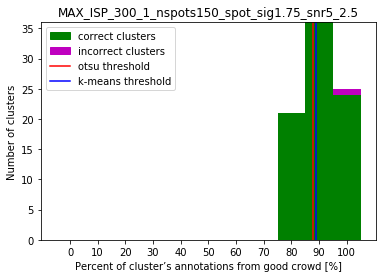

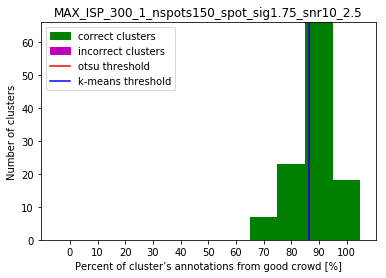

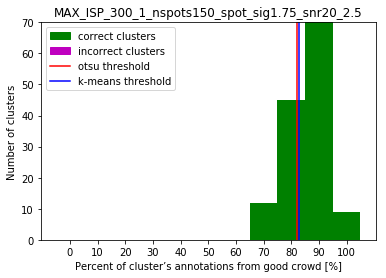

In [5]:
img_names = ['MAX_ISP_300_1_nspots150_spot_sig1.75_snr5_2.5',
             'MAX_ISP_300_1_nspots150_spot_sig1.75_snr10_2.5',
             'MAX_ISP_300_1_nspots150_spot_sig1.75_snr20_2.5']

for img_name in img_names:
    img_filename = img_name+'spot_img.png'
    img_filepath = '/Users/jenny.vo-phamhi/Documents/FISH-annotation/Annotation/gen_'+gen_date+'/spot_images/'+bg_type+'/'+img_name+'spot_img.png'
    csv_filepath = '/Users/jenny.vo-phamhi/Documents/FISH-annotation/Annotation/gen_'+gen_date+'/spot_data/'+bg_type+'/'+img_name+'_coord_snr_list.csv'
    json_filepath = '/Users/jenny.vo-phamhi/Documents/FISH-annotation/Annotation/gen_'+gen_date+'/'+json_filename
    ba = QuantiusAnnotation(json_filepath)
    sa = SpotAnnotationAnalysis(ba)
    anno_all = ba.df()
    anno_one_snr = ba.slice_by_image(anno_all, img_filename)
    plot_title = img_name
    
    df_good_workers_pairwise = sa.slice_workers_by_pairwise_scores(anno_one_snr)
    clusters_good_workers_pairwise = sa.get_clusters(df_good_workers_pairwise, clustering_params)
    small_clusters, large_clusters = sa.sort_clusters_by_size(clusters_good_workers_pairwise)
    other_crowd, good_crowd = sa.sort_workers_by_membership_in_large_clusters(anno_one_snr, large_clusters)
    sa.plot_fraction_from_crowd_per_cluster(large_clusters, good_crowd, show_correctness, correctness_threshold, csv_filepath, img_height, plot_title, bigger_window_size)

# Background: Cells

In [6]:
json_filename = 'SynthData_cells.json'
gen_date = '20180719'
bg_type = 'cells'

## Cells, 50 spots

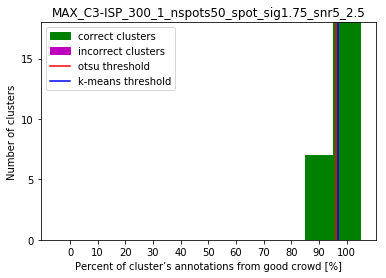

In [7]:
img_names = ['MAX_C3-ISP_300_1_nspots50_spot_sig1.75_snr5_2.5',
             'MAX_C3-ISP_300_1_nspots50_spot_sig1.75_snr10_2.5',
             'MAX_C3-ISP_300_1_nspots50_spot_sig1.75_snr20_2.5']

img_names = ['MAX_C3-ISP_300_1_nspots50_spot_sig1.75_snr5_2.5']

for img_name in img_names:
    img_filename = img_name+'spot_img.png'
    img_filepath = '/Users/jenny.vo-phamhi/Documents/FISH-annotation/Annotation/gen_'+gen_date+'/spot_images/'+bg_type+'/'+img_name+'spot_img.png'
    csv_filepath = '/Users/jenny.vo-phamhi/Documents/FISH-annotation/Annotation/gen_'+gen_date+'/spot_data/'+bg_type+'/'+img_name+'_coord_snr_list.csv'
    json_filepath = '/Users/jenny.vo-phamhi/Documents/FISH-annotation/Annotation/gen_'+gen_date+'/'+json_filename
    ba = QuantiusAnnotation(json_filepath)
    sa = SpotAnnotationAnalysis(ba)
    anno_all = ba.df()
    anno_one_snr = ba.slice_by_image(anno_all, img_filename)
    plot_title = img_name
    
    df_good_workers_pairwise = sa.slice_workers_by_pairwise_scores(anno_one_snr)
    clusters_good_workers_pairwise = sa.get_clusters(df_good_workers_pairwise, clustering_params)
    small_clusters, large_clusters = sa.sort_clusters_by_size(clusters_good_workers_pairwise)
    other_crowd, good_crowd = sa.sort_workers_by_membership_in_large_clusters(anno_one_snr, large_clusters)
    sa.plot_fraction_from_crowd_per_cluster(large_clusters, good_crowd, show_correctness, correctness_threshold, csv_filepath, img_height, plot_title, bigger_window_size)

## Cells, 100 spots

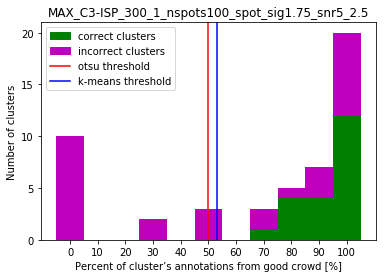

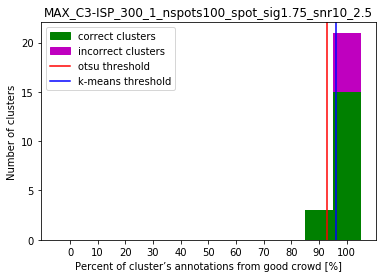

In [8]:
img_names = ['MAX_C3-ISP_300_1_nspots100_spot_sig1.75_snr5_2.5',
             'MAX_C3-ISP_300_1_nspots100_spot_sig1.75_snr10_2.5',
             'MAX_C3-ISP_300_1_nspots100_spot_sig1.75_snr20_2.5']

img_names = ['MAX_C3-ISP_300_1_nspots100_spot_sig1.75_snr5_2.5',
             'MAX_C3-ISP_300_1_nspots100_spot_sig1.75_snr10_2.5']

for img_name in img_names:
    img_filename = img_name+'spot_img.png'
    img_filepath = '/Users/jenny.vo-phamhi/Documents/FISH-annotation/Annotation/gen_'+gen_date+'/spot_images/'+bg_type+'/'+img_name+'spot_img.png'
    csv_filepath = '/Users/jenny.vo-phamhi/Documents/FISH-annotation/Annotation/gen_'+gen_date+'/spot_data/'+bg_type+'/'+img_name+'_coord_snr_list.csv'
    json_filepath = '/Users/jenny.vo-phamhi/Documents/FISH-annotation/Annotation/gen_'+gen_date+'/'+json_filename
    ba = QuantiusAnnotation(json_filepath)
    sa = SpotAnnotationAnalysis(ba)
    anno_all = ba.df()
    anno_one_snr = ba.slice_by_image(anno_all, img_filename)
    plot_title = img_name
    
    df_good_workers_pairwise = sa.slice_workers_by_pairwise_scores(anno_one_snr)
    clusters_good_workers_pairwise = sa.get_clusters(df_good_workers_pairwise, clustering_params)
    small_clusters, large_clusters = sa.sort_clusters_by_size(clusters_good_workers_pairwise)
    other_crowd, good_crowd = sa.sort_workers_by_membership_in_large_clusters(anno_one_snr, large_clusters)
    sa.plot_fraction_from_crowd_per_cluster(small_clusters, good_crowd, show_correctness, correctness_threshold, csv_filepath, img_height, plot_title, bigger_window_size)

## Cells, 150 spots

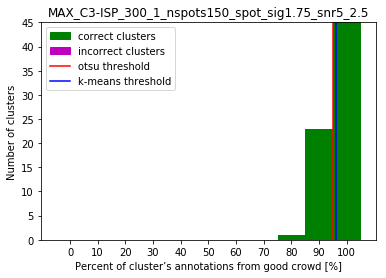

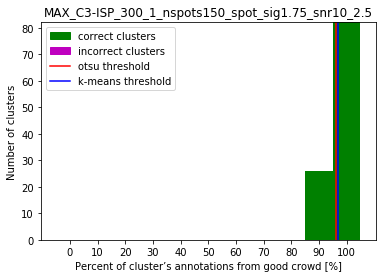

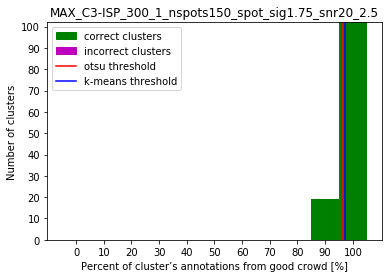

In [9]:
img_names = ['MAX_C3-ISP_300_1_nspots150_spot_sig1.75_snr5_2.5',
             'MAX_C3-ISP_300_1_nspots150_spot_sig1.75_snr10_2.5',
             'MAX_C3-ISP_300_1_nspots150_spot_sig1.75_snr20_2.5']

for img_name in img_names:
    img_filename = img_name+'spot_img.png'
    img_filepath = '/Users/jenny.vo-phamhi/Documents/FISH-annotation/Annotation/gen_'+gen_date+'/spot_images/'+bg_type+'/'+img_name+'spot_img.png'
    csv_filepath = '/Users/jenny.vo-phamhi/Documents/FISH-annotation/Annotation/gen_'+gen_date+'/spot_data/'+bg_type+'/'+img_name+'_coord_snr_list.csv'
    json_filepath = '/Users/jenny.vo-phamhi/Documents/FISH-annotation/Annotation/gen_'+gen_date+'/'+json_filename
    ba = QuantiusAnnotation(json_filepath)
    sa = SpotAnnotationAnalysis(ba)
    anno_all = ba.df()
    anno_one_snr = ba.slice_by_image(anno_all, img_filename)
    plot_title = img_name
    
    df_good_workers_pairwise = sa.slice_workers_by_pairwise_scores(anno_one_snr)
    clusters_good_workers_pairwise = sa.get_clusters(df_good_workers_pairwise, clustering_params)
    small_clusters, large_clusters = sa.sort_clusters_by_size(clusters_good_workers_pairwise)
    other_crowd, good_crowd = sa.sort_workers_by_membership_in_large_clusters(anno_one_snr, large_clusters)
    sa.plot_fraction_from_crowd_per_cluster(large_clusters, good_crowd, show_correctness, correctness_threshold, csv_filepath, img_height, plot_title, bigger_window_size)